In [1]:
"""
GravMag: 3D forward modeling of total-field magnetic anomaly using triaxial
ellipsoids (model with induced and remanent magnetization)
"""
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from fatiando import mesher, gridder, utils
from fatiando.gravmag import ellipsoid_triaxial,ellipsoid_prolate,ellipsoid_oblate,sphere

C:\Users\diego_000\Documents\fatiando\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
# The regional field
inten,inc, dec = 60000., 50., 20.
bounds = [-5000, 5000, -5000, 5000, 0, 5000]
# Create a regular grid at 100m height
shape = (200, 200)
area = bounds[:4]
xp, yp, zp = gridder.regular(area, shape, z=0)

## Triaxial

In [6]:
model_t1 = [mesher.EllipsoidTriaxial(0.,0.,1000.,150.0, 100.0, 75.0, 0.,0.,0., 
                                 {'remanence': [10000, 25., 40.],
                                  'k': [0.01, 0.01, 0.01, 0., 90., 90.]})]

# Calculate the anomaly for a given regional field
bx_t = ellipsoid_triaxial.bx_c(xp,yp,zp,inten,inc,dec,model_t1)
by_t = ellipsoid_triaxial.by_c(xp,yp,zp,inten,inc,dec,model_t1)
bz_t = ellipsoid_triaxial.bz_c(xp,yp,zp,inten,inc,dec,model_t1)
tf_t,N1,N2,N3,JRD_ang = ellipsoid_triaxial.tf_c(xp,yp,zp,inten,inc,dec,model_t1)

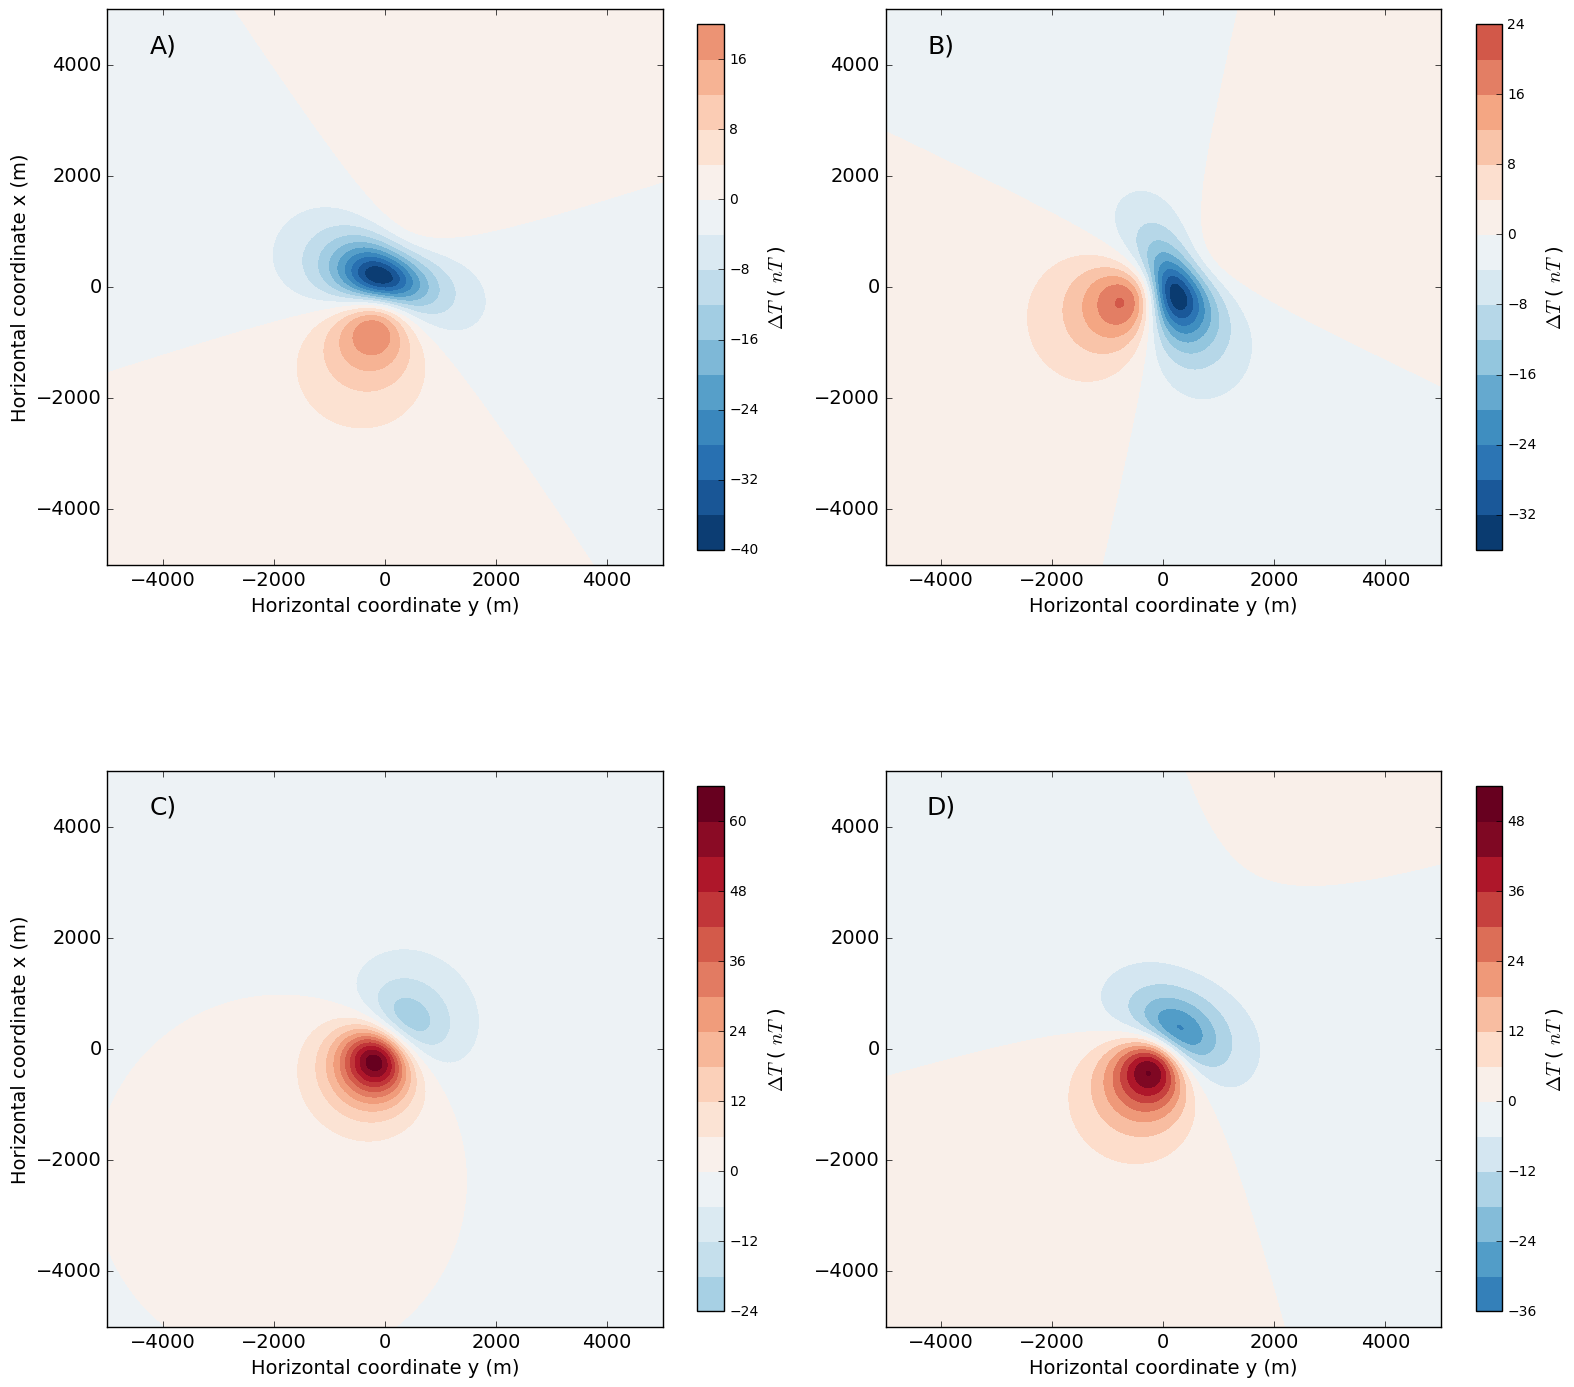

In [7]:
rangesbx = np.max(np.abs([np.max(bx_t), np.min(bx_t)]))
rangesby = np.max(np.abs([np.max(by_t), np.min(by_t)]))
rangesbz = np.max(np.abs([np.max(bz_t), np.min(bz_t)]))
rangestf = np.max(np.abs([np.max(tf_t), np.min(tf_t)]))


plt.figure(figsize=(16,16))

plt.subplot(2,2,1)
plt.title('A)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,bx_t,15,
            vmin = -rangesbx, vmax = rangesbx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(2,2,2)
plt.title('B)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,by_t,15,
            vmin = -rangesby, vmax = rangesby,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
#plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(2,2,3)
plt.title('C)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,bz_t,15,
            vmin = -rangesbz, vmax = rangesbz,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(2,2,4)
plt.title('D)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,tf_t,15,
            vmin = -rangestf, vmax = rangestf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
#plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()
plt.savefig('..\\figures\\ellipsoid_triaxial.pdf', dpi = 600, facecolor='w', bbox_inches='tight')

## Prolate

In [14]:
model_p = [mesher.EllipsoidProlate(0.,0.,1000.,200.,100.,45.,0., 
                                 {'remanence': [10000, 90., 0.],
                                  'k': [0.01, 0.01, 0.01, 0., 90., 90.]})]

# Calculate the anomaly for a given regional field
bx_p = ellipsoid_prolate.bx_c(xp,yp,zp,inten,inc,dec,model_p)
by_p = ellipsoid_prolate.by_c(xp,yp,zp,inten,inc,dec,model_p)
bz_p = ellipsoid_prolate.bz_c(xp,yp,zp,inten,inc,dec,model_p)
tf_p,N1,N2 = ellipsoid_prolate.tf_c(xp,yp,zp,inten,inc,dec,model_p)

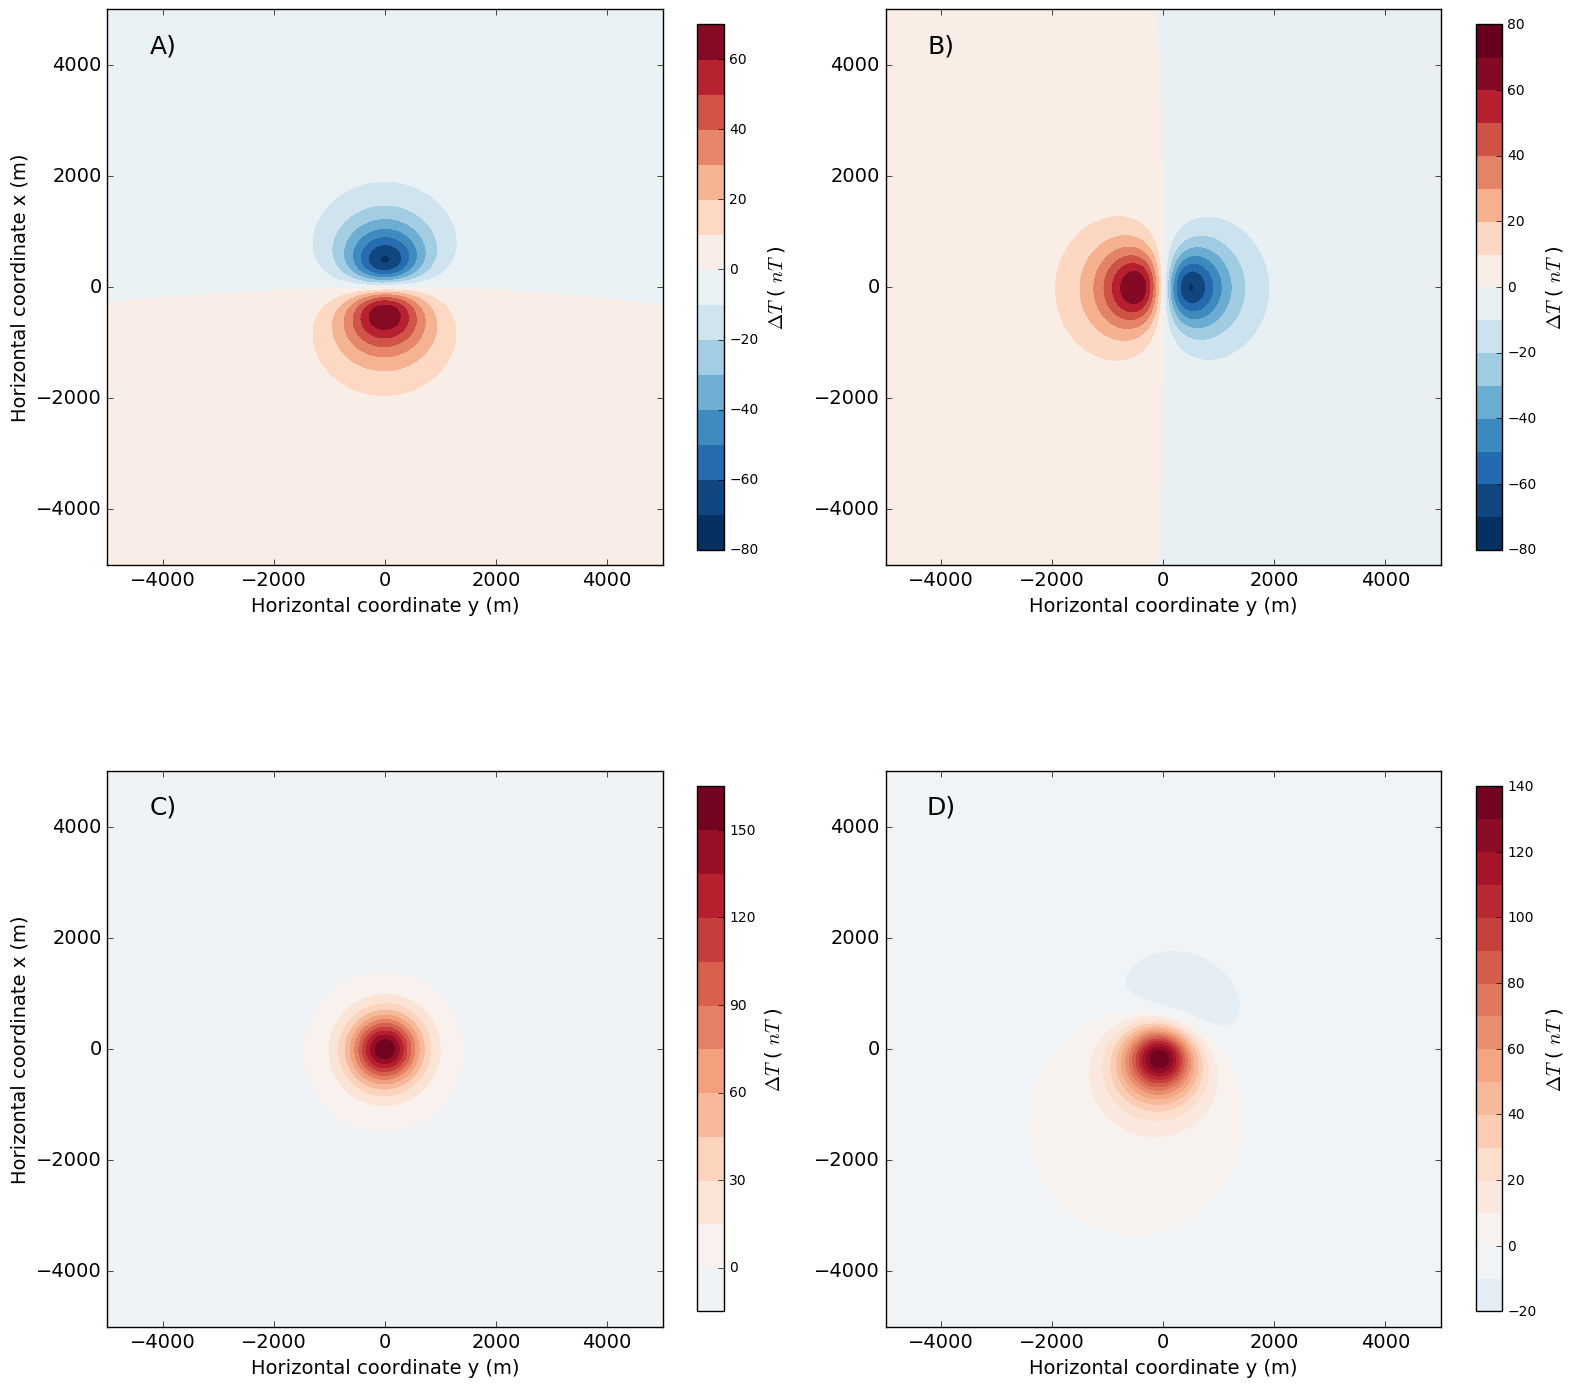

In [15]:
rangesbx = np.max(np.abs([np.max(bx_p), np.min(bx_p)]))
rangesby = np.max(np.abs([np.max(by_p), np.min(by_p)]))
rangesbz = np.max(np.abs([np.max(bz_p), np.min(bz_p)]))
rangestf = np.max(np.abs([np.max(tf_p), np.min(tf_p)]))


plt.figure(figsize=(16,16))

plt.subplot(2,2,1)
plt.title('A)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,bx_p,15,
            vmin = -rangesbx, vmax = rangesbx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(2,2,2)
plt.title('B)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,by_p,15,
            vmin = -rangesby, vmax = rangesby,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
#plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(2,2,3)
plt.title('C)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,bz_p,15,
            vmin = -rangesbz, vmax = rangesbz,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(2,2,4)
plt.title('D)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,tf_p,15,
            vmin = -rangestf, vmax = rangestf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
#plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()
plt.savefig('..\\figures\\ellipsoid_prolate.pdf', dpi = 600, facecolor='w', bbox_inches='tight')

## Oblate

In [16]:
model_o = [mesher.EllipsoidOblate(0.,0.,1000.,100,200.,45.,0., 
                                 {'remanence': [10000, 90., 0.],
                                  'k': [0.01, 0.01, 0.01, 0., 90., 90.]})]

# Calculate the anomaly for a given regional field
bx_o = ellipsoid_oblate.bx_c(xp,yp,zp,inten,inc,dec,model_o)
by_o = ellipsoid_oblate.by_c(xp,yp,zp,inten,inc,dec,model_o)
bz_o = ellipsoid_oblate.bz_c(xp,yp,zp,inten,inc,dec,model_o)
tf_o,N1,N2 = ellipsoid_oblate.tf_c(xp,yp,zp,inten,inc,dec,model_o)

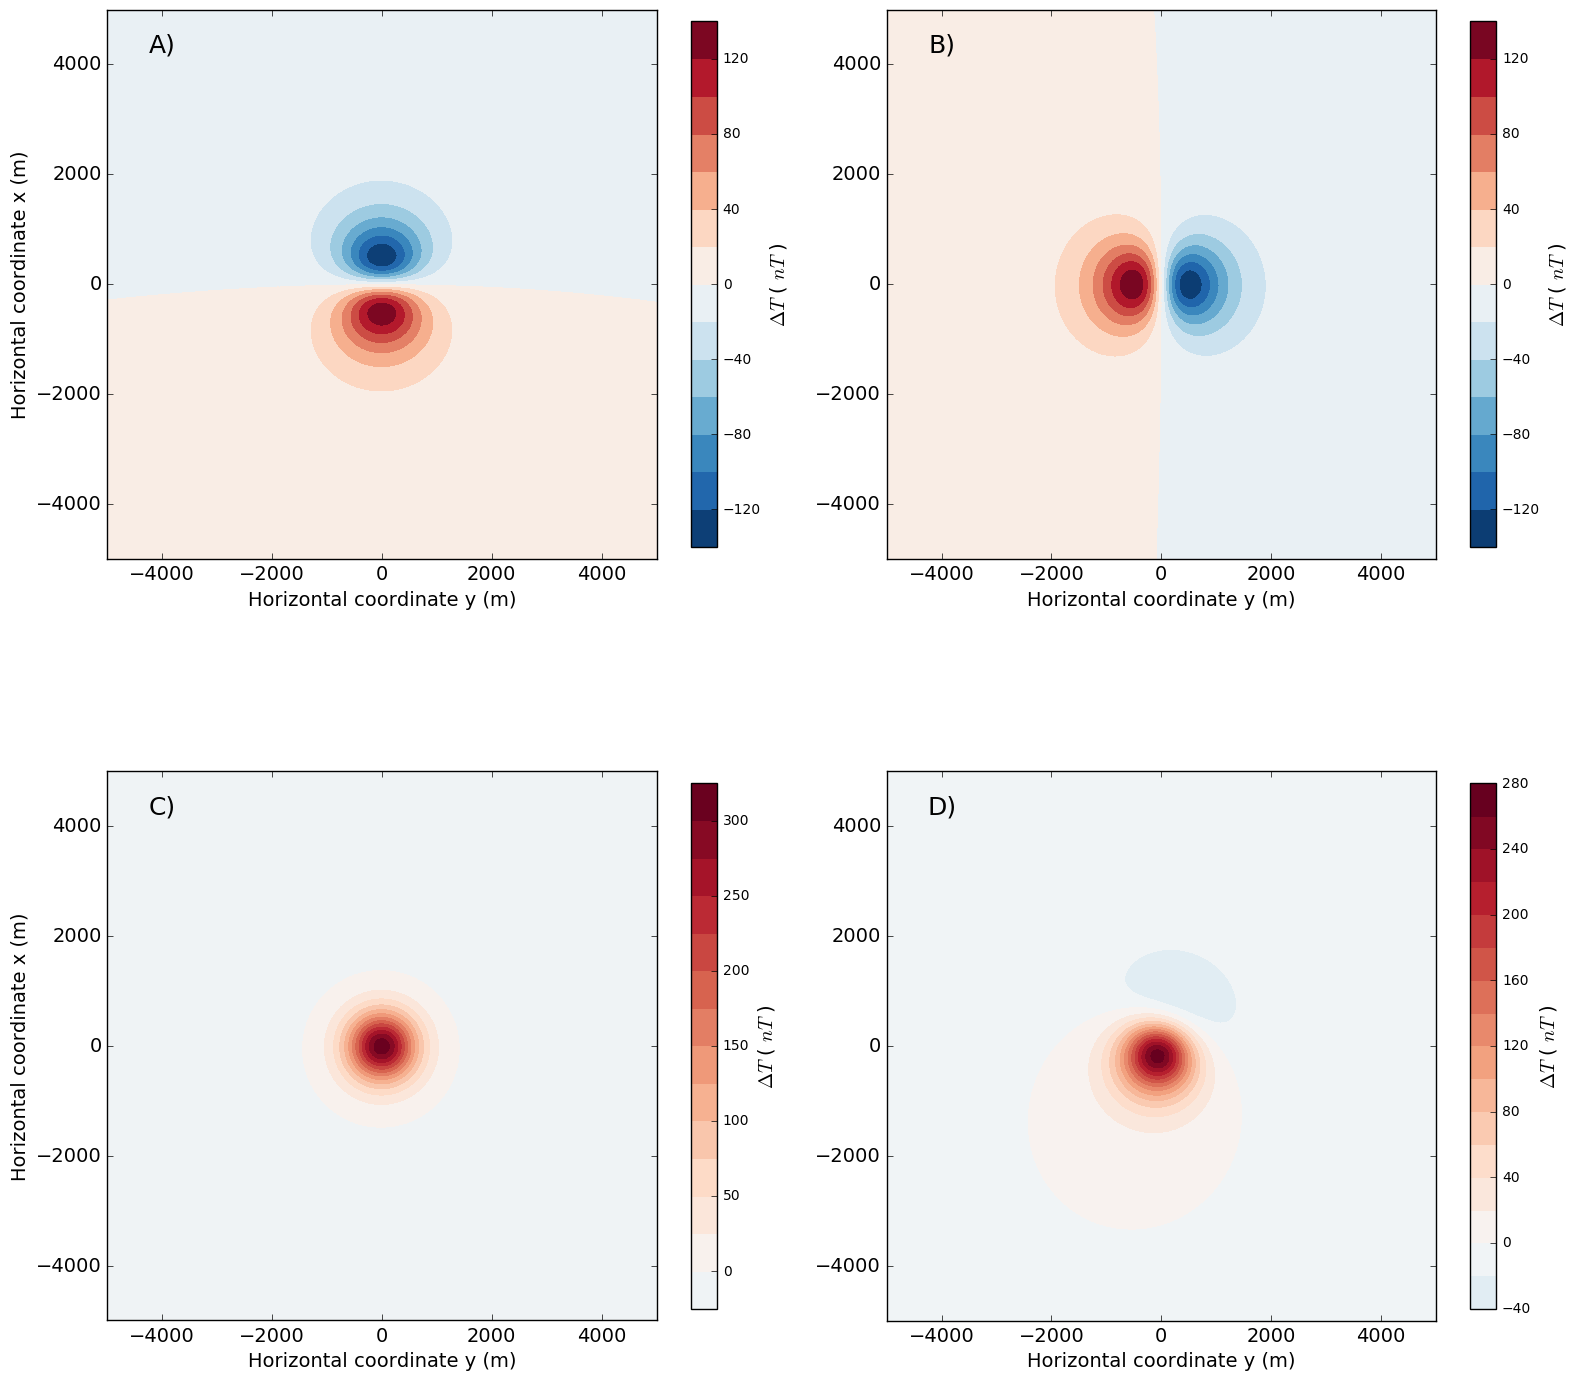

In [17]:
rangesbx = np.max(np.abs([np.max(bx_o), np.min(bx_o)]))
rangesby = np.max(np.abs([np.max(by_o), np.min(by_o)]))
rangesbz = np.max(np.abs([np.max(bz_o), np.min(bz_o)]))
rangestf = np.max(np.abs([np.max(tf_o), np.min(tf_o)]))


plt.figure(figsize=(16,16))

plt.subplot(2,2,1)
plt.title('A)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,bx_o,15,
            vmin = -rangesbx, vmax = rangesbx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(2,2,2)
plt.title('B)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,by_o,15,
            vmin = -rangesby, vmax = rangesby,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
#plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(2,2,3)
plt.title('C)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,bz_o,15,
            vmin = -rangesbz, vmax = rangesbz,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(2,2,4)
plt.title('D)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,tf_o,15,
            vmin = -rangestf, vmax = rangestf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
#plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()
plt.savefig('..\\figures\\ellipsoid_oblate.pdf', dpi = 600, facecolor='w', bbox_inches='tight')

# Multi Triaxial

In [7]:
model_t2 = [mesher.EllipsoidTriaxial(-2500.,-2500.,1000.,150.0, 100.0, 75.0, 0.,0.,0., 
                                 {'remanence': [10000, 25., 40.],
                                  'k': [0.01, 0.01, 0.01, 0., 90., 90.]}),
           mesher.EllipsoidTriaxial(2500.,2500.,750.,200.0, 120.0, 60.0, 0.,0.,0., 
                                 {'remanence': [7500, 25., 40.],
                                  'k': [0.01, 0.01, 0.01, 0., 90., 90.]})]

# Calculate the anomaly for a given regional field
bx_t2 = ellipsoid_triaxial.bx_c(xp,yp,zp,inten,inc,dec,model_t2)
by_t2 = ellipsoid_triaxial.by_c(xp,yp,zp,inten,inc,dec,model_t2)
bz_t2 = ellipsoid_triaxial.bz_c(xp,yp,zp,inten,inc,dec,model_t2)
tf_t2,N12,N22,N32,JRD_ang2 = ellipsoid_triaxial.tf_c(xp,yp,zp,inten,inc,dec,model_t2)

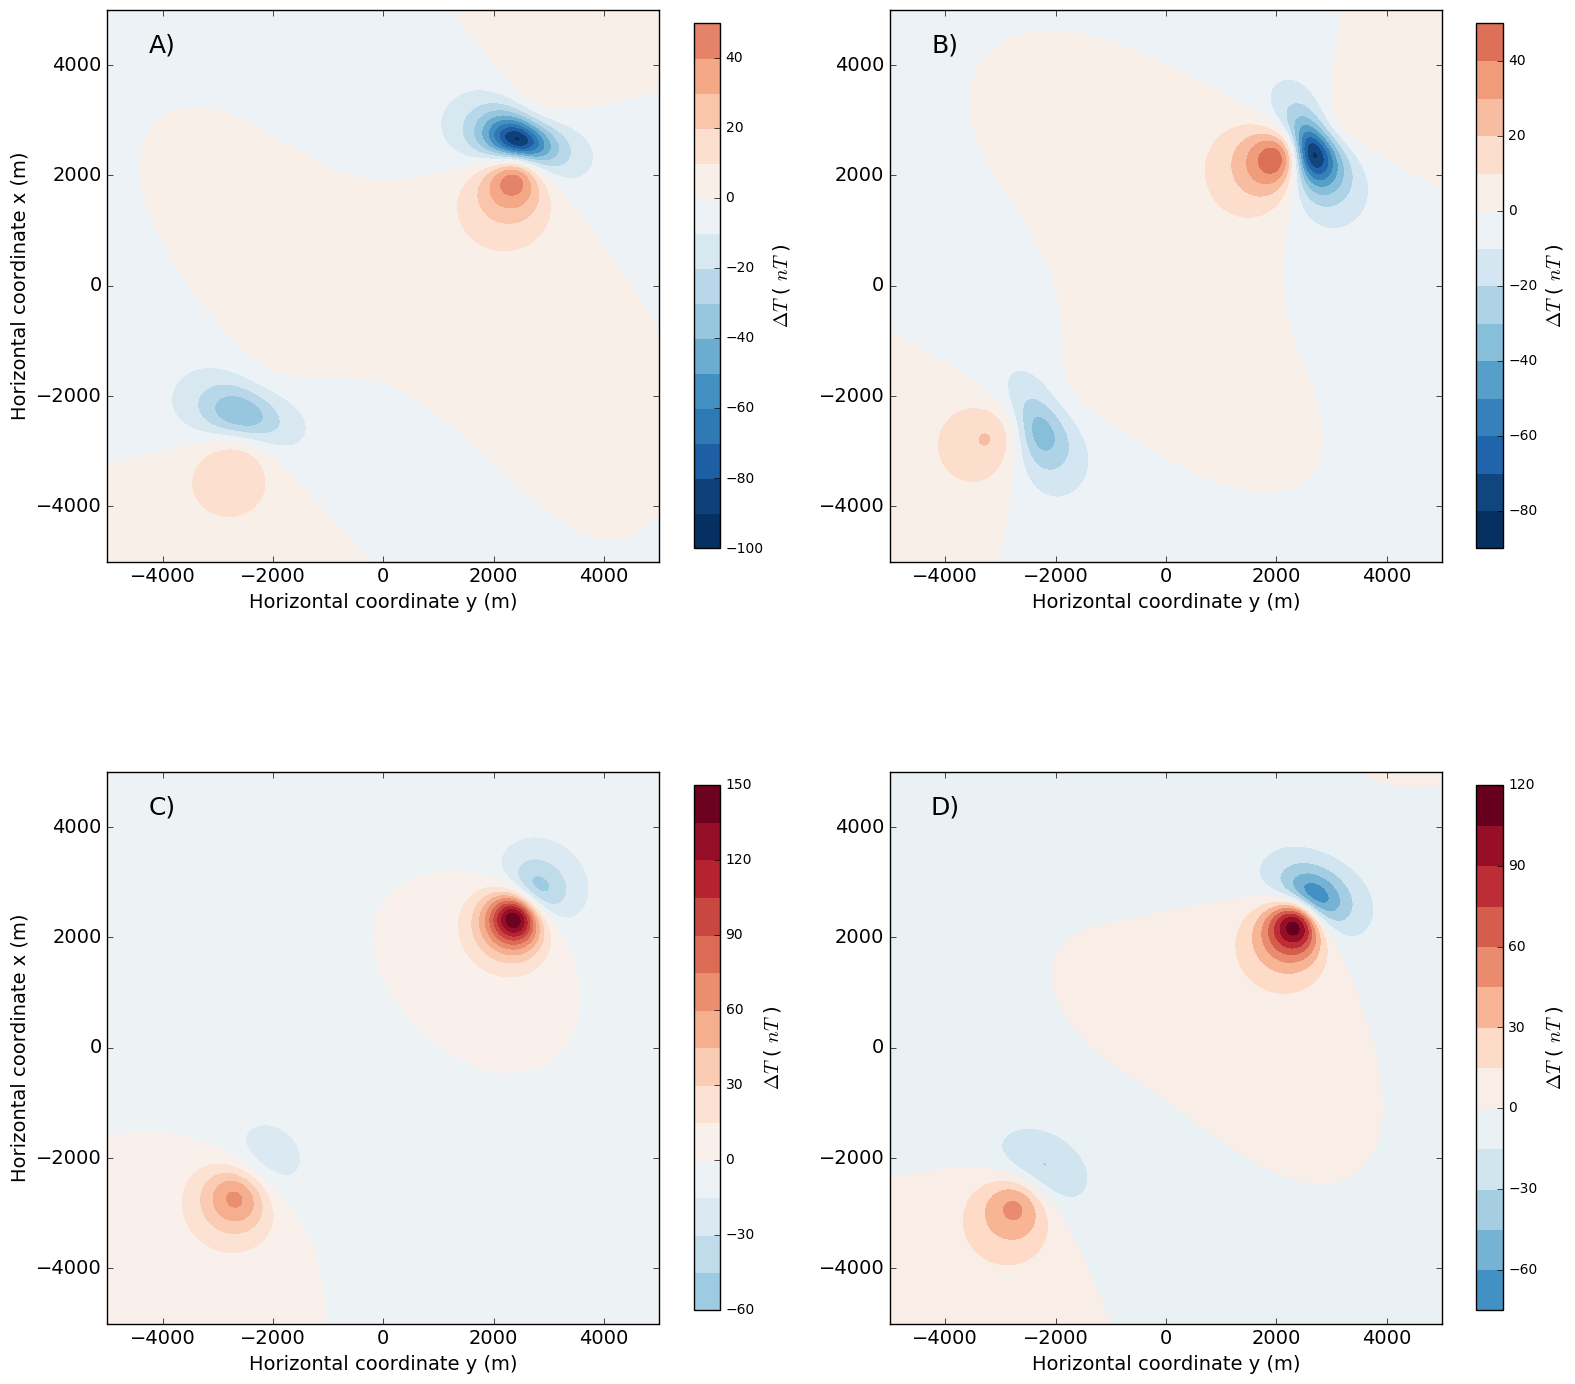

In [8]:
rangesbx = np.max(np.abs([np.max(bx_t2), np.min(bx_t2)]))
rangesby = np.max(np.abs([np.max(by_t2), np.min(by_t2)]))
rangesbz = np.max(np.abs([np.max(bz_t2), np.min(bz_t2)]))
rangestf = np.max(np.abs([np.max(tf_t2), np.min(tf_t2)]))


plt.figure(figsize=(16,16))

plt.subplot(2,2,1)
plt.title('A)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,bx_t2,15,
            vmin = -rangesbx, vmax = rangesbx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(2,2,2)
plt.title('B)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,by_t2,15,
            vmin = -rangesby, vmax = rangesby,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
#plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(2,2,3)
plt.title('C)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,bz_t2,15,
            vmin = -rangesbz, vmax = rangesbz,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.subplot(2,2,4)
plt.title('D)', y=0.91, x=0.1, fontsize=18)
plt.axis('scaled')
plt.tricontourf(yp,xp,tf_t2,15,
            vmin = -rangestf, vmax = rangestf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.65)
cb.set_label('$\Delta T$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(bounds[2],bounds[3])
plt.ylim(bounds[0],bounds[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal coordinate y (m)', fontsize=14)
#plt.ylabel('Horizontal coordinate x (m)', fontsize=14)

plt.tight_layout()
plt.savefig('..\\figures\\ellipsoid_triaxial_multi.pdf', dpi = 600, facecolor='w', bbox_inches='tight')